# Proj 1

In [2]:
def least_squares_poly(X, y, degree):
    """
        ---PURPOSE------------------------------------

        Finds the vector of coefficients for a polynomial of varying degree and
        a set of X and y points.

        ---INPUT--------------------------------------

        X           2-D Array of shape (N,p)
        y           1-D Array of shape (N,)
        degree      Integer greater than zero

        ---OUTPUT-------------------------------------

        beta        NumPy 1-D array
        exponents   NumPy 2-D array
    """

    X = np.array(X)
    y = np.array(y)

    if x.shape[0] != y.shape[0]:
        msg = "\n\nArguments <x> and <y> in function <least_squares_poly> must be of "
        msg += f"the same shape.  \n\n\tx.shape = {x.shape}\ny.shape = {y.shape}"
        raise Exception(msg)

    if len(y.shape) != 1:
        msg = "\n\nArgument <y> in function <least_squares_poly> must be "
        msg += f"one dimensional.  \n\n\ty.shape = {y.shape}"
        raise Exception(msg)

    N = X.shape[0]
    p = X.shape[1]

    try:
        if degree == int(degree) and degree > 0:
            degree = int(degree)
        else:
            msg = "\n\nArgument <degree> in function <least_squares_poly> must be an "
            msg += f"integer greater than zero.  \ndegree = {degree}"
            raise Exception(msg)
    except ValueError:
        msg = "\n\nArgument <degree> in function <least_squares_poly> must be a "
        msg += f"number.  \n\n\ttype(degree) = {type(degree)}"
        raise Exception(msg)

    M = int(degree) + 1

    powers = np.arange(0, M, 1)
    exponents = list(permutations(powers, 2))

    for power in powers:
        exponents.append(power*np.ones(p))

    expo_sum = np.sum(exponents, axis = 1)
    valid_idx = np.where(np.less_equal(expo_sum, degree))[0]

    exponents = np.array(exponents)
    exponents = exponents[valid_idx]

    A = np.zeros((N, exponents.shape[0]))

    for n,exponent in enumerate(exponents):
        A[:,n] = np.prod(X**exponent, axis = 1)

    beta = np.linalg.inv(A.T @ A) @ A.T @ y
    return beta, exponent


# Create $\hat{x}$ and $\hat{y}$

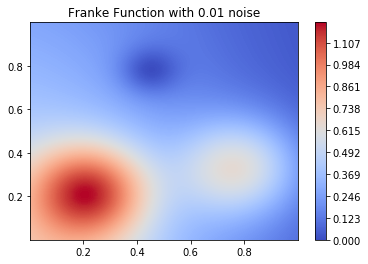

In [160]:
import itertools as it
import numpy as np
from franke import FrankeFunction
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()

x_size = 1000

#matrices for plotting
x = np.sort(np.random.uniform(0, 1, x_size))
y = np.sort(np.random.uniform(0, 1, x_size))
x, y = np.meshgrid(x,y)
z=FrankeFunction(x,y)

#change to vectors
noise =0.01
x_array = np.ravel(x)
y_array = np.ravel(y)
z_array= np.ravel(z)+noise*np.random.randn(len(x_array))

plt.title('Franke Function with %s noise' %noise)
plt.contourf(x,y,z, 1000, cmap=cm.coolwarm)
plt.colorbar();
plt.show()






# create design matrix and beta vector

In [159]:
order=5

exponents = list(it.product(range(0,order+1), repeat=2))

expo_sum = np.sum(exponents, axis = 1)
valid_index = np.where(np.less_equal(expo_sum, order))[0]

exponents = np.array(exponents)
exponents = exponents[valid_index]


design_matrix = np.zeros((x_array.shape[0], exponents.shape[0]))
for row in range(len(exponents)):
    for i in range(len(x_array)):
        design_matrix[i,row] = (x_array[i]**exponents[row][0])*(y_array[i]**exponents[row][1])

beta = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ z_array
print(beta)



[  0.393   3.831  -9.07   -6.777  27.635 -15.834   7.752 -14.993  20.368
 -29.562  16.77  -33.613  44.461  -7.381  -5.554  46.197 -53.509  10.493
 -20.967  19.154   0.263]
